In [94]:
import numpy as np
from scipy.linalg import svd

# To find pgm files
import glob

# To time the grid search
import time

# To read and show pgm files
from skimage.io import imread, imshow

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
%precision %.5f
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Palatino']})

plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def soft_thresholding(mat, epsilon):
    """
    Soft thresholding operator
    Proximal operator of the L1 norm
    :param mat: matrix to threshold
    :param epsilon: value of threshold
    :return mat: thresholded matrix
    """
    mat[np.abs(mat) < epsilon] = 0
    mat[mat > epsilon] -= epsilon
    mat[mat < -epsilon] += epsilon

    return mat

In [10]:
def svalue_thresholding(mat, epsilon):
    """
    Singular value thresholding
    Proximal operator of the nuclear norm
    :param mat: matrix of svalue to threshold
    :param epsilon: value of threshold
    :return mat: thresholded matrix
    """
    u, s, v = svd(mat, full_matrices = False, lapack_driver = 'gesvd')
    soft_thresholding(s, epsilon)
    return u.dot(np.diag(s).dot(v))

In [28]:
def lrmc(X, W, tau, beta, tol = 10e-3, A_init = 0):
    """
    Finds a low-rank matrix A whose entries in W coincide
    with those of X by using the SVT algorithm.
    :param X: DxN data matrix
    :param W: DxN binary matrix denoting known (1) or missing (0) entries
    :param tau: Parameter of the optimization problem
    :param beta: Step size of the dual gradient ascent step
    :param tol: tolerance for convergence boost speed
    :return A: Low-rank completion of the mtrix X
    """
    A = A_init
    Z = beta * (X * W - A * W)
    stop = False
    while (stop == False):
        Z_prev = Z
        A = svalue_thresholding(Z * W, tau)
        Z = Z + beta * (X - A) * W
        if (np.linalg.norm(Z - Z_prev) / (tol + np.linalg.norm(Z_prev)) <= tol):
            stop = True
#         print (np.linalg.norm(Z - Z_prev) / (tol + np.linalg.norm(Z_prev)))
    return A

In [58]:
def as_si(x, ndp):
    """
    Credits to xnx
    https://stackoverflow.com/questions/31453422/displaying-numbers-with-x-instead-of-e-scientific-notation-in-matplotlib
    """
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))


In [16]:
IMG_DIR = "images/"
INDIVIDUALS = ["yaleB01", "yaleB02", "yaleB03"]

In [6]:
faces = {}
for k in INDIVIDUALS:
    faces[k] = {}
    faces[k]['files'] = glob.glob(IMG_DIR + k + "/" + k + "_P00A" + "*.pgm")
    faces[k]["data"] = np.concatenate([imread(f).reshape(-1, 1)\
                                       for f in faces[k]['files']], axis = 1)
    # Draw uniformly at random
    for i in np.arange(10) * 10 :
        faces[k][i] = np.random.choice([0,1],
                                       size = faces[k]["data"].shape,
                                       p = [i/100, 1 - i/100])

In [35]:
# D = faces['yaleB01']
# MSE_1 = {}
# RES_1 = {}
# n_cols = 64
# # tau_range = [200000, 400000, 600000]
# tau_range = [100000, 200000, 400000, 600000, 800000]
# # tau_range = [1000, 10000, 50000, 100000, 2000000, 300000, 400000, 500000, 600000, 700000, 1000000]

# # plt.figure(figsize = (10, 10))
# # plt.imshow(RES[50][100000][:,0].reshape(192,168), cmap = "gray");

# start_time = time.time()
# for M in [30., 50., 70., 90.]:
# # for M in [90.]:
#     print ("--------------- % of missing entries : {} ---------------".format(M/100))
#     MSE_1[M] = {}
#     RES_1[M] = {}
#     for t in range(len(tau_range)):
#         print ("Power for entrepreneurs : {}".format(tau_range[t]))
#         RES_1[M][tau_range[t]] = lrmc(D["data"][:, :n_cols], D[M][:, :n_cols],
#                          tau = tau_range[t],
#                          beta = min(2, 1/(1-M/100.)),
#                          tol = 10e-4,
#                          A_init = RES_1[M][tau_range[t - 1]] if t > 0 else 0)
#         MSE_1[M][tau_range[t]] = ((D["data"][:, :n_cols] - RES_1[M][tau_range[t]]) ** 2).mean(axis = 0)
        
# end_time = time.time()
# print("total time taken this loop: ", end_time - start_time)

--------------- % of missing entries : 0.3 ---------------
Power for entrepreneurs : 100000
Power for entrepreneurs : 200000
Power for entrepreneurs : 400000
Power for entrepreneurs : 600000
Power for entrepreneurs : 800000
--------------- % of missing entries : 0.5 ---------------
Power for entrepreneurs : 100000
Power for entrepreneurs : 200000
Power for entrepreneurs : 400000
Power for entrepreneurs : 600000
Power for entrepreneurs : 800000
--------------- % of missing entries : 0.7 ---------------
Power for entrepreneurs : 100000
Power for entrepreneurs : 200000
Power for entrepreneurs : 400000
Power for entrepreneurs : 600000
Power for entrepreneurs : 800000
--------------- % of missing entries : 0.9 ---------------
Power for entrepreneurs : 100000
Power for entrepreneurs : 200000
Power for entrepreneurs : 400000
Power for entrepreneurs : 600000
Power for entrepreneurs : 800000
total time taken this loop:  1258.3827505111694


In [20]:
# Tol = 10e-4
[MSE[90][k].mean() for k in MSE[90].keys()]

[2370.23350, 1434.12970, 1619.55531, 2055.09579]

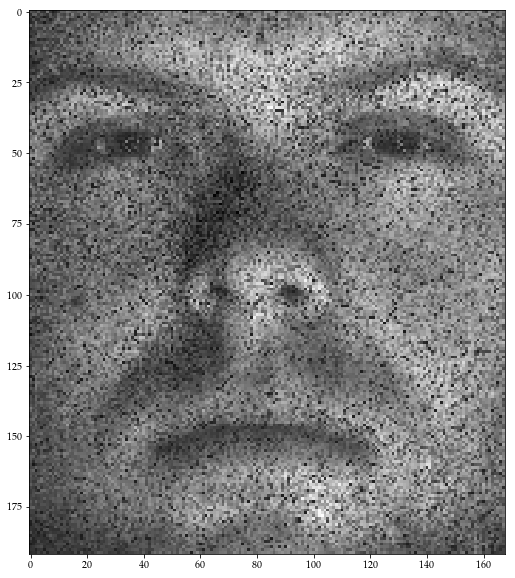

In [32]:
plt.figure(figsize = (10, 10))
plt.imshow(RES[90][200000][:,0].reshape(192,168), cmap = "gray");

In [98]:
# Tol = 10e-4
[MSE[50][k].mean() for k in MSE[50].keys()]

[168.98605, 122.80266, 103.35131, 108.74627, 101.86616]

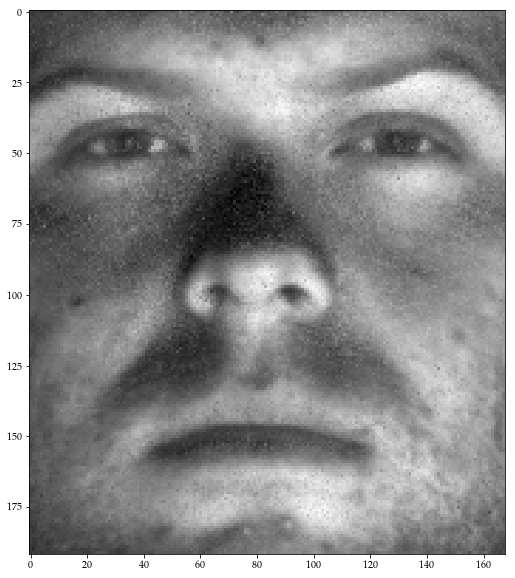

In [33]:
plt.figure(figsize = (10, 10))
plt.imshow(RES[50][600000][:,0].reshape(192,168), cmap = "gray");

In [69]:
import time

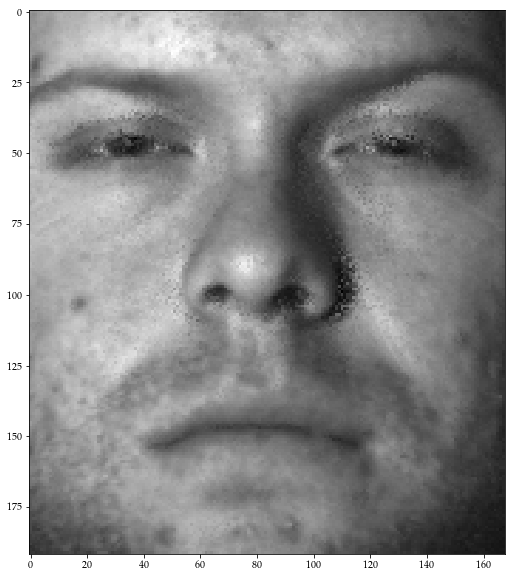

In [100]:
plt.figure(figsize = (10, 10))
plt.imshow(RES[50][600000][:,3].reshape(192,168), cmap = "gray");

In [95]:
# Tol = 10e-3
[MSE[50][k].mean() for k in MSE[50].keys()]

[159.23509, 119.54497, 167.93664, 122.35861, 220.69230]

In [130]:
MSE[50][100000][0]

60.74144

# Images completed

## Tol = $10^{-3}$

In [37]:
MSE[50].keys()

dict_keys([50000, 100000, 200000, 400000, 800000, 600000])

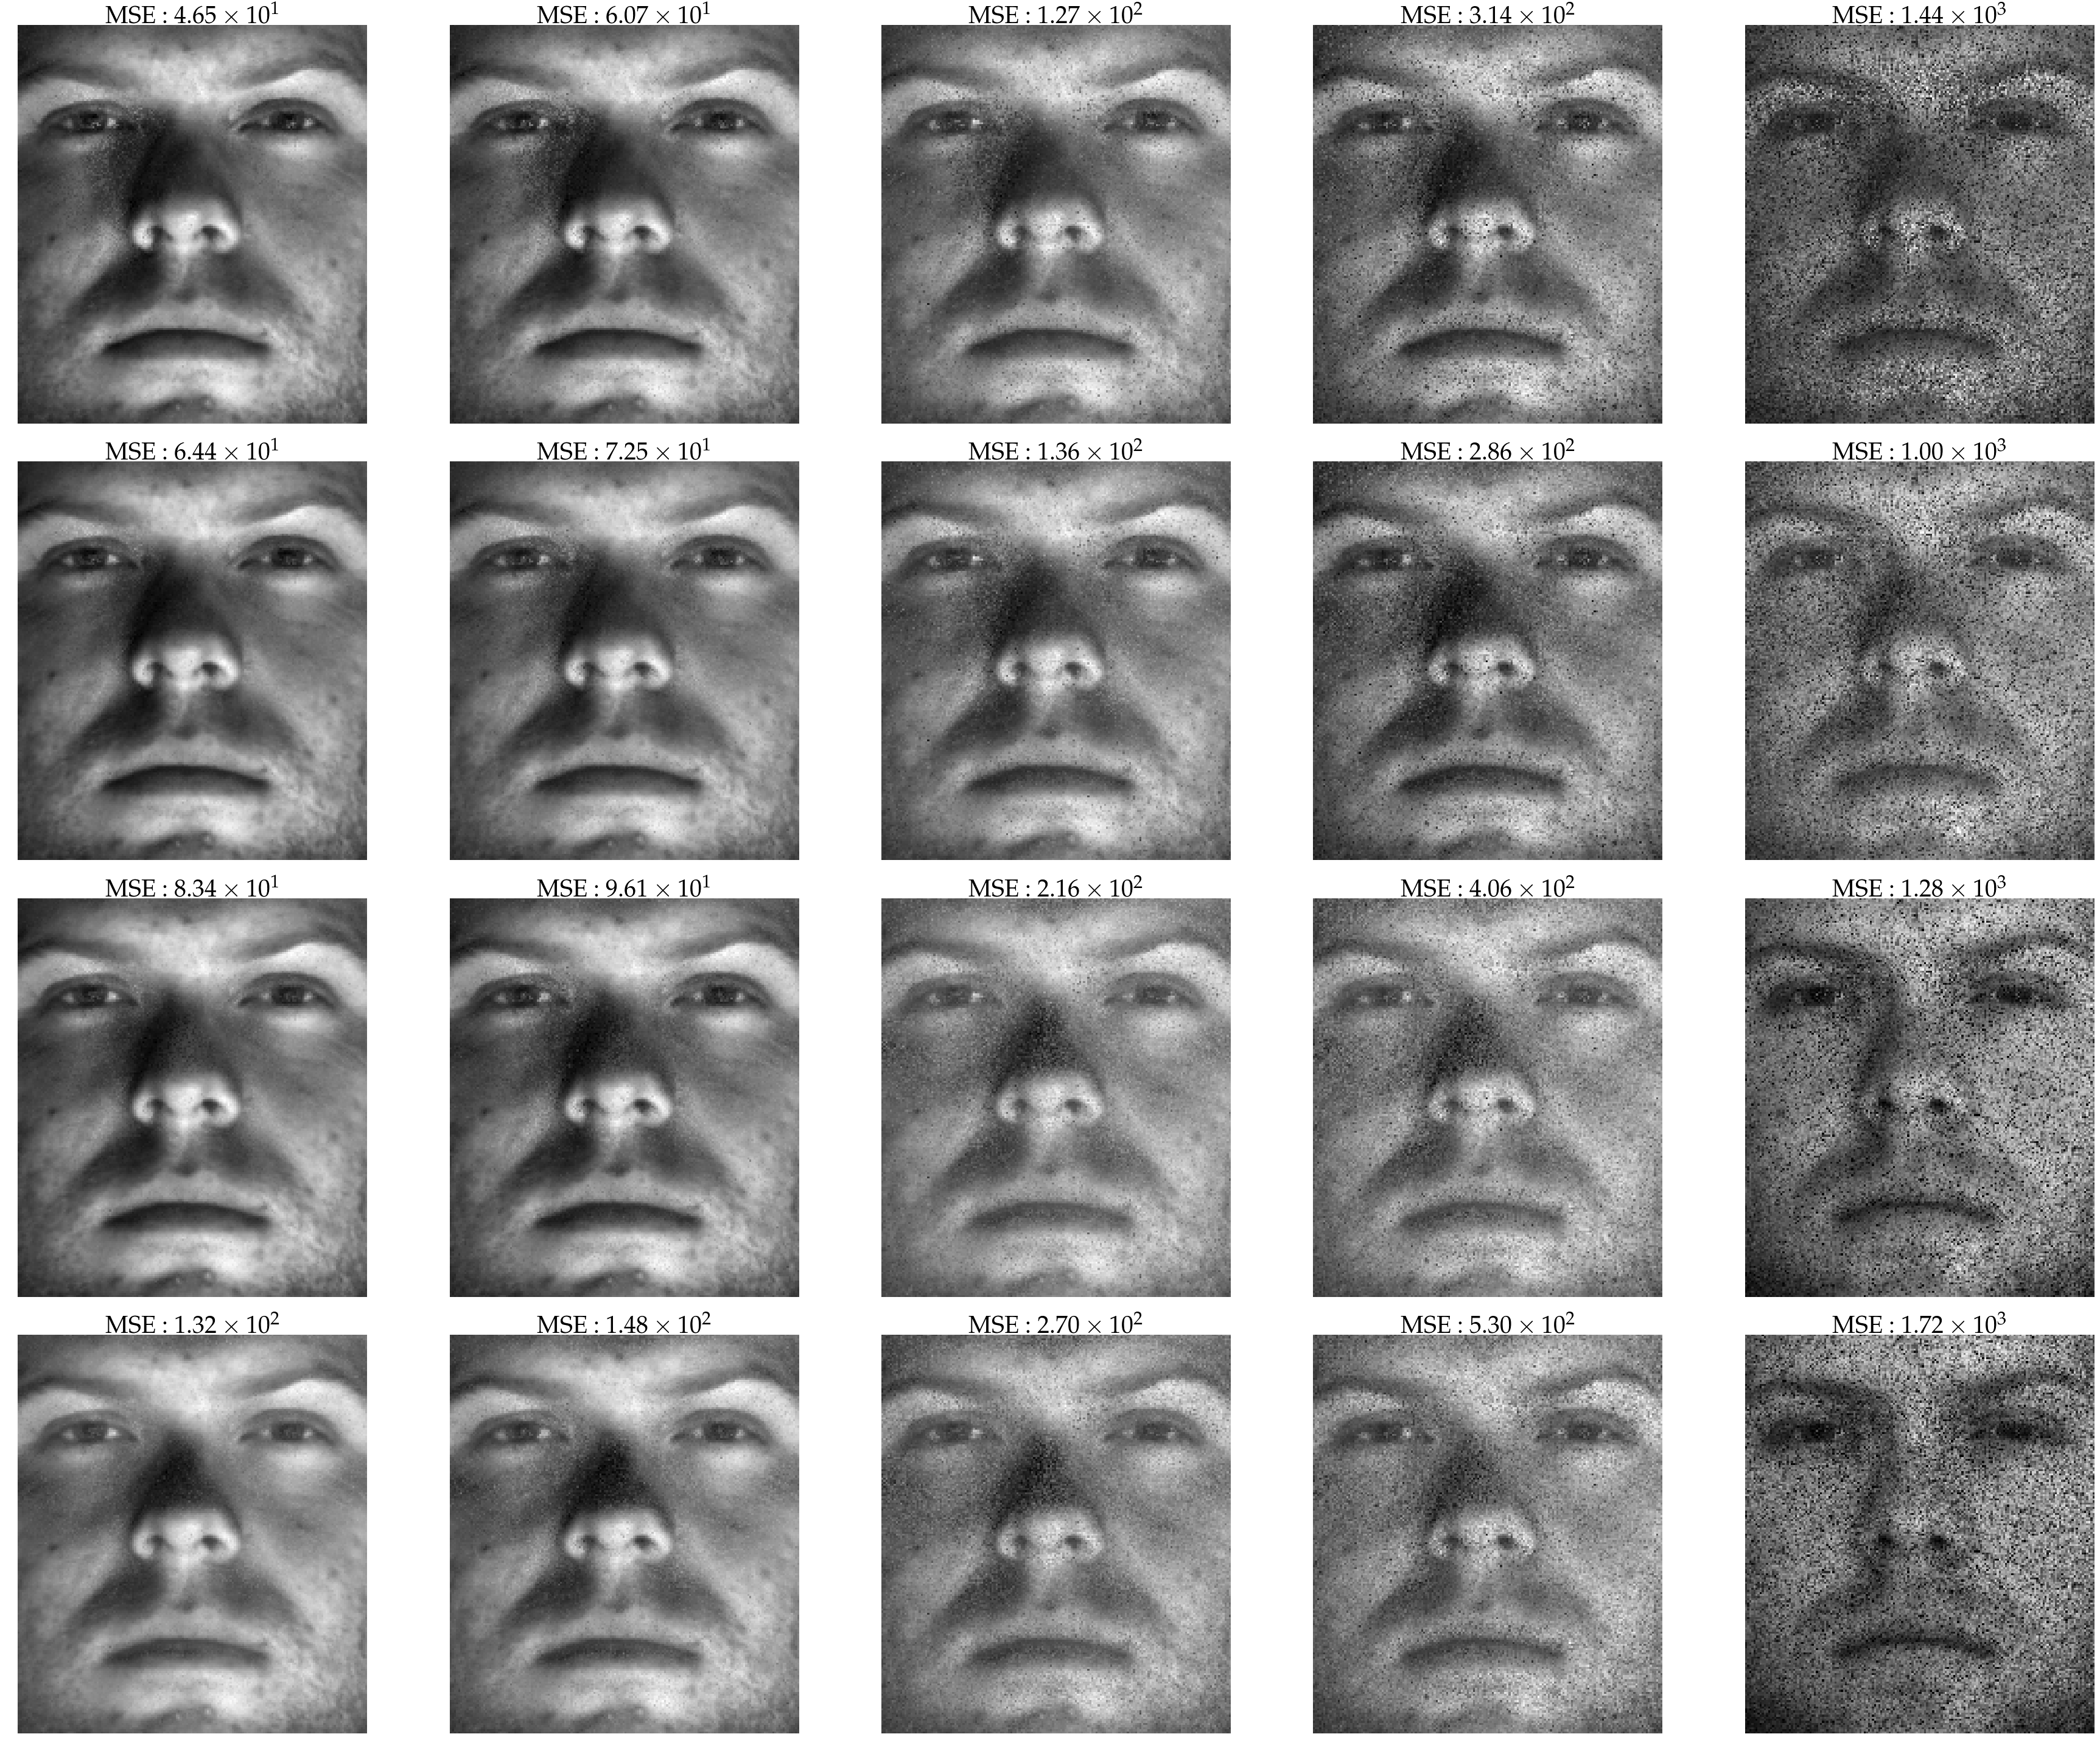

In [79]:
p = [30., 50., 70., 80., 90.]
tau = [100000, 200000, 400000, 600000]

h, w = len(tau), len(p)
f,ax = plt.subplots(h, w, figsize = (10 * w, 10 * h))

for i in range(h):
    for j in range(w):
        ax[i][j].axis('off')
        ax[i][j].imshow(RES[p[j]][tau[i]][:, 0].reshape(192,168), cmap = "gray")
        ax[i][j].set_title(r"MSE : ${}$".format(as_si(MSE[p[j]][tau[i]][0], 2)),
                           fontsize = 40)
f.tight_layout();
f.savefig("images/2.png")

## Tol = $10^{-4}$

In [44]:
MSE_1[30].keys()

dict_keys([100000, 200000, 400000, 600000, 800000])

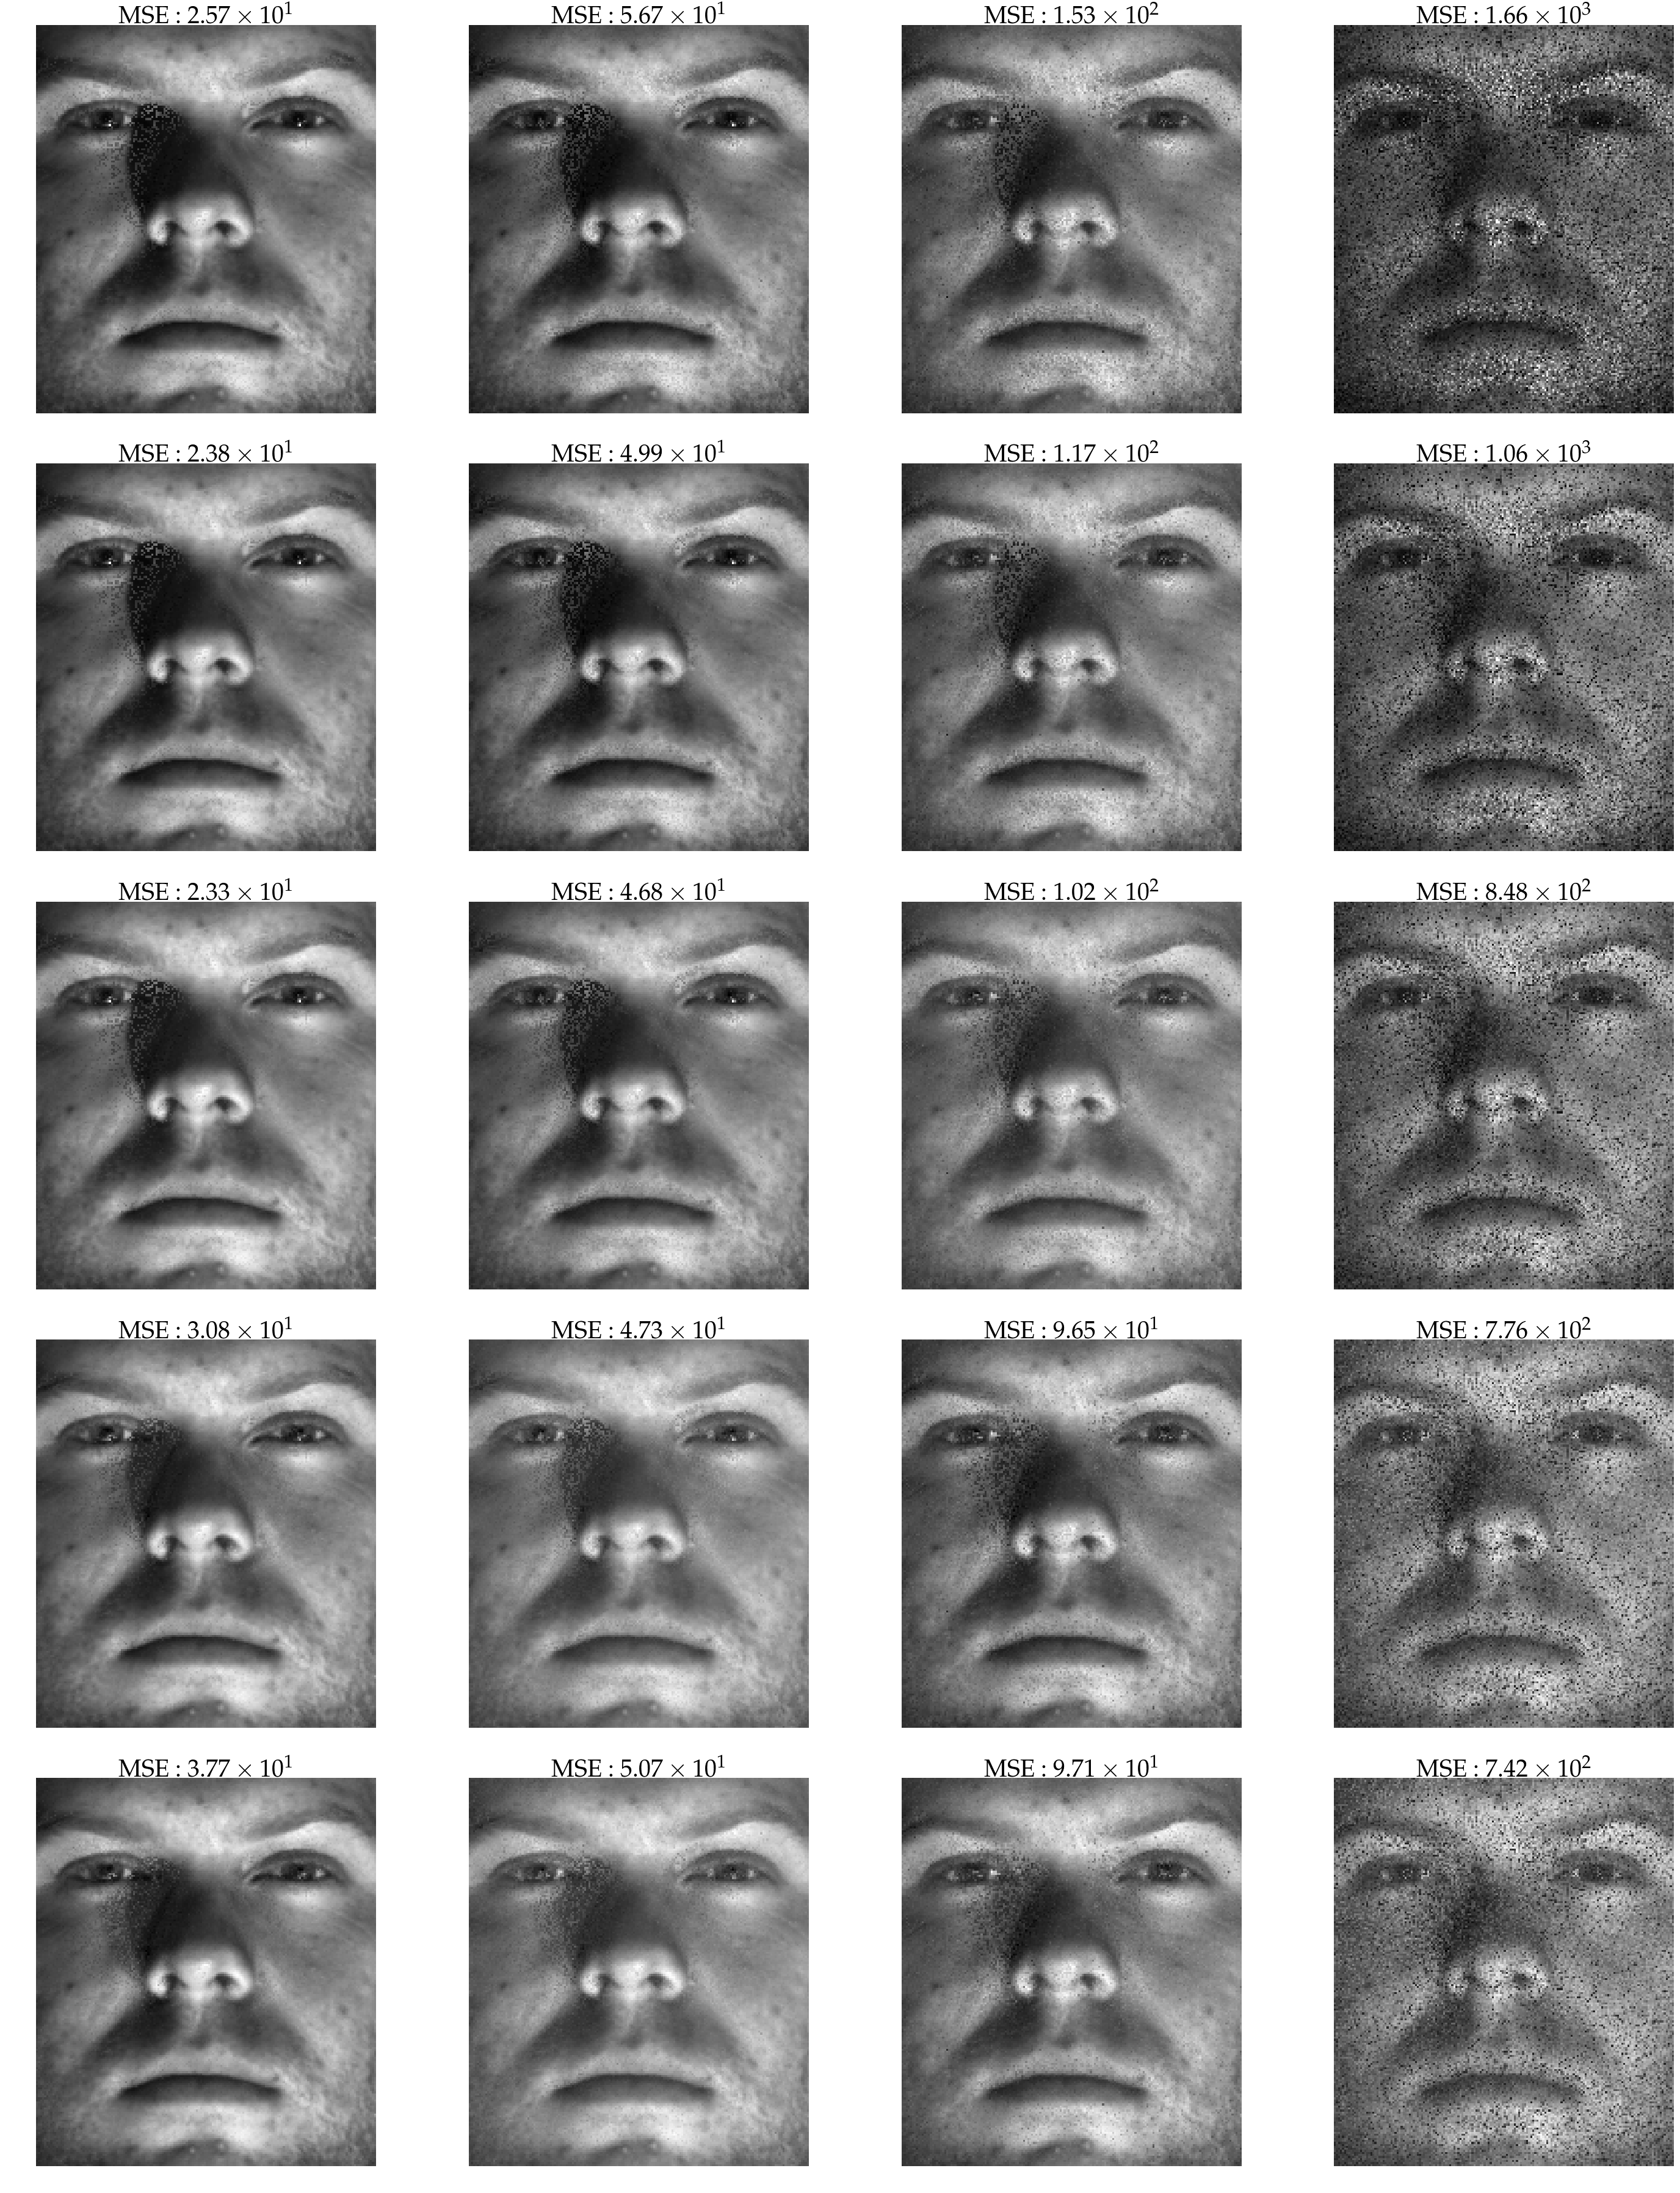

In [133]:
p = [30., 50., 70., 90.]
tau = [100000, 200000, 400000, 600000, 800000]

h, w = len(tau), len(p)
f,ax = plt.subplots(h, w, figsize = (10 * w, 10 * h))

for i in range(h):
    for j in range(w):
        ax[i][j].axis('off')
        ax[i][j].imshow(RES_1[p[j]][tau[i]][:, 0].reshape(192,168), cmap = "gray")
        ax[i][j].set_title(r"MSE : ${}$".format(as_si(MSE_1[p[j]][tau[i]][0], 2)),
                           fontsize = 40)
        
f.tight_layout();
# f.savefig("images/2_bis.png")

## plot MSE = f(missing)

In [83]:
# Tol = 10e-4
[MSE_1[90][k].mean() for k in MSE_1[90].keys()]

[2541.76805, 1587.97060, 1255.66466, 1164.55698, 1120.39423]

In [113]:
Curve = np.array([[MSE_1[k1][k].mean() for k in MSE_1[k1].keys()] for k1 in MSE_1.keys()])
Curve

array([[  121.41519334,   107.68928704,   102.15356263,   100.97093594,
          101.11490336],
       [ 2541.76805167,  1587.97059948,  1255.66465686,  1164.5569817 ,
         1120.39423301],
       [  318.9519856 ,   253.69746496,   229.47207098,   220.90137907,
          217.6323048 ],
       [   51.21363647,    47.67097072,    47.1274859 ,    48.89714931,
           51.20218127]])

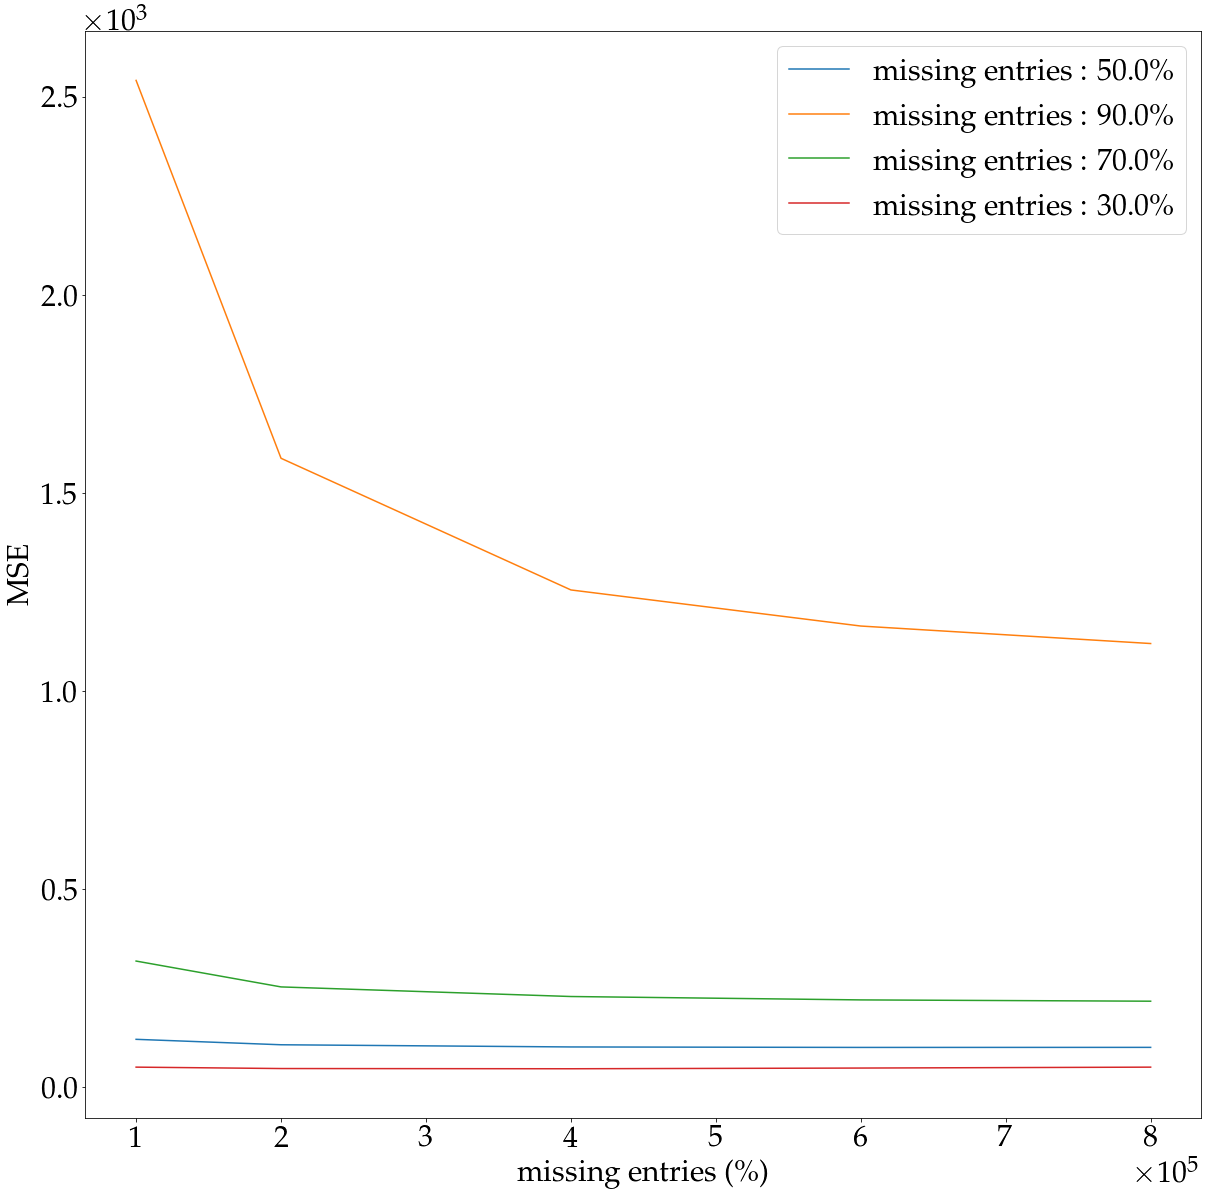

In [132]:
p = [30., 50., 70., 90.]
tau = [100000, 200000, 400000, 600000, 800000]

plt.figure(figsize = (20, 20))

i = 0
for k1 in MSE_1.keys():
#     plt.plot(p, Curve.T[i])
#     i += 1
    plt.plot(tau, [MSE_1[k1][k].mean() for k in MSE_1[k1].keys()],
             label = r"missing entries : {}\%%".format(k1))
plt.ylabel(r"MSE", size = 30)
plt.xlabel(r"missing entries (\%)", size = 30)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(fontsize = 30);
# plt.savefig("images/2_curve.png")

In [ ]:
p = [30., 50., 70., 90.]
tau = [100000, 200000, 400000, 600000, 800000]

plt.figure(figsize = (20, 20))

for k1 in MSE_1.keys():
    plt.plot(tau, [MSE_1[k1][k].mean() for k in MSE_1[k1].keys()],
             label = r"missing entries : {}\%%".format(k1))
plt.ylabel(r"MSE", size = 30)
plt.xlabel(r"$\tau$", size = 30)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(fontsize = 30);
plt.savefig("images/2_curve.png")